In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
#imports

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [2]:
#generate dataset and reshape to 50x50
batch_size=64
img_height=50
img_width=50

dataset_training=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/DeepLearning_practice/Birds500-20231107T064447Z-001/Birds500',
    labels='inferred',
    label_mode="categorical",
    #class_names=['Barred owl','Hornbill','Kookaburra','Marabou Stork','Tufted Puffin','Turkey'],
    #color_mode="grayscale",

    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=6666,
    validation_split=0.3,
    subset="training"
)

#the validation is basically the test set -- I have it as 10% rn, maybe make it more later as needed
dataset_validation=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/DeepLearning_practice/Birds500-20231107T064447Z-001/Birds500',
    labels='inferred',
    label_mode="categorical",
    #class_names=['Barred owl','Hornbill','Kookaburra','Marabou Stork','Tufted Puffin','Turkey'],
    #color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=6666,
    validation_split=0.3,
    subset="validation"
)

val_batches = tf.data.experimental.cardinality(dataset_validation)
test_ds = dataset_validation.take((2*val_batches) // 3)
val_ds = dataset_validation.skip((2*val_batches) // 3)


Found 3000 files belonging to 6 classes.
Using 2100 files for training.
Found 3000 files belonging to 6 classes.
Using 900 files for validation.


In [3]:
#view the labels to make sure its all good
class_names=dataset_training.class_names
print(class_names)

['Barred owl', 'Hornbill', 'Kookaburra', 'Marabou Stork', 'Tufted Puffin', 'Turkey']


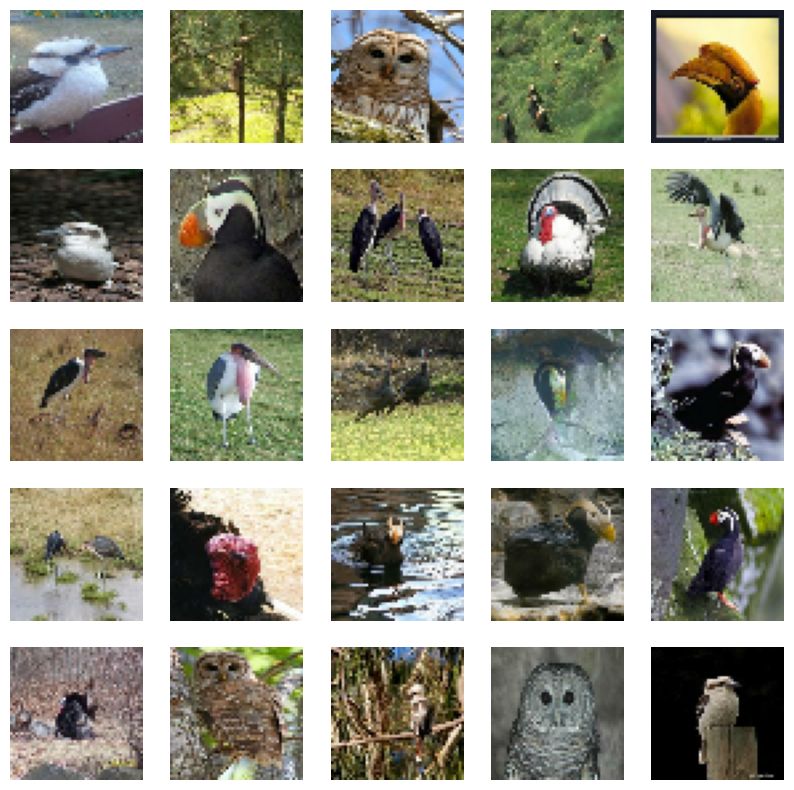

In [4]:
#plotting the validation set as it is smaller
import matplotlib.pyplot as plt

# so my batch size is 32, and i am doing .take(1), so take 1 batch which is 32 images, so you cant pull out more than 32 images

plt.figure(figsize=(10, 10))
for images, labels in dataset_validation.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title([labels[i]])
    plt.axis("off")

In [5]:
# create the CNN model to get an accuracy of 95%

# configure the dataset for performance
AUTOTUNE=tf.data.AUTOTUNE
train_ds=dataset_training.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=dataset_validation.cache().prefetch(buffer_size=AUTOTUNE)


In [5]:
import numpy as np

for lamb in np.arange(0.4,1.0,0.1):
    print(lamb)


0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999


In [ ]:
num_classes = 6

neurons =1000
filters=[[64,32,16,8],[128,64,32,16],[32,64,128,256],[16,32,64,128],[64,64,128,128],[128,128,64,64]]
import numpy as np
for f in range(6):
  for lamb in np.arange(0.01,0.1,0.01):
    for drop in np.arange(0.4,1.0,0.1):
      print(lamb)
      print(drop)
      print(filters[f])
      model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255),
        #tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        #tf.keras.layers.RandomRotation(0.2),

        tf.keras.layers.Conv2D(filters[f][0], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(filters[f][1], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(filters[f][2], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(filters[f][3], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(neurons, activation='relu'),
        #tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(neurons, activation='relu'),
        #tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(neurons, activation='relu'),
      # tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(neurons, activation='relu'),
        #tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(neurons, activation='relu'),
        tf.keras.layers.Dropout(drop),


        tf.keras.layers.Dense(num_classes)
      ])

      #compile the model
      model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

      history=model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=100
      )
      # Training Results
      epochs=100
      acc = history.history['accuracy']
      val_acc = history.history['val_accuracy']

      loss = history.history['loss']
      val_loss = history.history['val_loss']

      epochs_range = range(epochs)

      plt.figure(figsize=(8, 8))
      plt.subplot(1, 2, 1)
      plt.plot(epochs_range, acc, label='Training Accuracy')
      plt.plot(epochs_range, val_acc, label='Validation Accuracy')
      plt.legend(loc='lower right')
      plt.title('Training and Validation Accuracy')

      plt.subplot(1, 2, 2)
      plt.plot(epochs_range, loss, label='Training Loss')
      plt.plot(epochs_range, val_loss, label='Validation Loss')
      plt.legend(loc='upper right')
      plt.title('Training and Validation Loss')
      plt.show()


Epoch 1/100
33/33 [==============================] - 3s 14ms/step - loss: 2.3808 - accuracy: 0.1800 - val_loss: 2.1311 - val_accuracy: 0.1667
Epoch 2/100
33/33 [==============================] - 0s 8ms/step - loss: 2.0322 - accuracy: 0.1676 - val_loss: 1.9566 - val_accuracy: 0.1711
Epoch 3/100
33/33 [==============================] - 0s 9ms/step - loss: 1.9044 - accuracy: 0.1843 - val_loss: 1.8552 - val_accuracy: 0.2489
Epoch 4/100
33/33 [==============================] - 0s 8ms/step - loss: 1.8046 - accuracy: 0.2405 - val_loss: 1.8212 - val_accuracy: 0.2356
Epoch 5/100
33/33 [==============================] - 0s 8ms/step - loss: 1.7061 - accuracy: 0.2729 - val_loss: 1.7005 - val_accuracy: 0.3089
Epoch 6/100
33/33 [==============================] - 0s 8ms/step - loss: 1.6200 - accuracy: 0.2929 - val_loss: 1.6321 - val_accuracy: 0.3211
Epoch 7/100
33/33 [==============================] - 0s 8ms/step - loss: 1.5308 - accuracy: 0.3490 - val_loss: 1.5511 - val_accuracy: 0.3500
Epoch 8/100


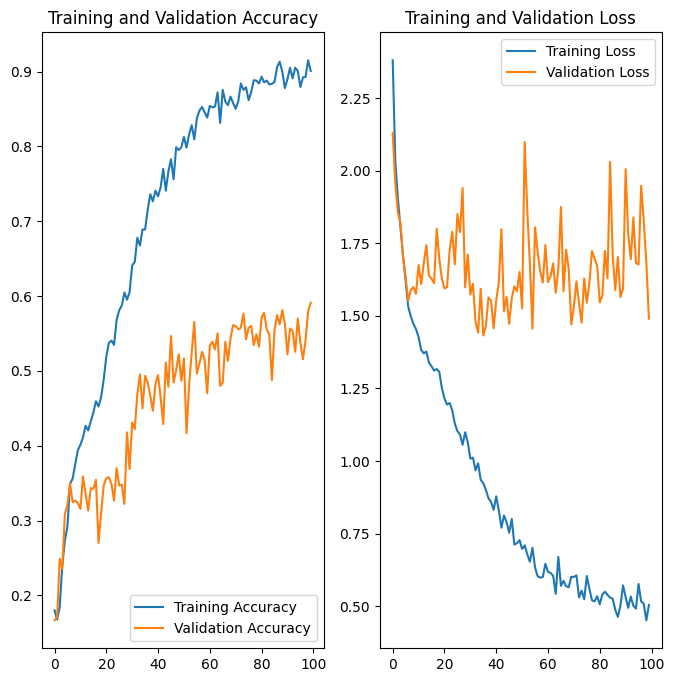

In [101]:
# model
num_classes=6
#build cnn model
i=1
import numpy as np
#filters=[[64,32,16,8],[128,64,32,16],[32,64,128,256],[16,32,64,128],[64,64,128,128],[128,128,64,64]]

filters=[32,64,128,256]
drop=0.3
dropoing=0.6
lamb=0.003

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  #tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.Conv2D(filters[0], 3, activation='relu'),
  tf.keras.layers.Dropout(drop),
  tf.keras.layers.MaxPooling2D(),


  #tf.keras.layers.Conv2D(filters[1], 3, activation='relu'),
  tf.keras.layers.Conv2D(filters[1], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
  tf.keras.layers.Dropout(drop),
  tf.keras.layers.MaxPooling2D(),


  #tf.keras.layers.Conv2D(filters[2], 3, activation='relu'),
  tf.keras.layers.Conv2D(filters[2], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
  tf.keras.layers.Dropout(drop),
  tf.keras.layers.MaxPooling2D(),


  #tf.keras.layers.Conv2D(filters[3], 3, activation='relu'),
  tf.keras.layers.Conv2D(filters[3], 3, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(lamb)),
   tf.keras.layers.Dropout(drop),
  tf.keras.layers.MaxPooling2D(),


  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(dropoing),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(dropoing),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(dropoing),
  tf.keras.layers.Dense(num_classes)
])


#compile the model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)
# Training Results
epochs=100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Training Results

epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Predict on the test set
predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)




28/28 [==============================] - 7s 202ms/step
(896, 6)


In [ ]:
np.argmax(score[0])
print(100*np.max(score[0]))

40.32617807388306


In [ ]:
class_names=['Barred owl','Hornbill','Kookaburra','Marabou Stork','Tufted Puffin','Turkey']
print (class_names[0])


Barred owl


In [ ]:
class_names=['Barred owl','Hornbill','Kookaburra','Marabou Stork','Tufted Puffin','Turkey']

label_prediction=[]
label_prediction.append('Predictions')
for i in range(25):
  result=np.argmax(score[i])
  #acc=str(100*np.max(score[i]))

  if result==0:
    #print (class_names[0])
    label_prediction.append(class_names[result])
    #print("Accuracy: " + acc)

  elif result==1:
      #print (class_names[1])
      label_prediction.append(class_names[result])
      #print("Accuracy: " + acc)


  elif result==2:
      #print (class_names[2])
      label_prediction.append(class_names[result])
      #print("Accuracy: " + acc)

  elif result==3:
      #print (class_names[3])
      label_prediction.append(class_names[result])
      #print("Accuracy: " + acc)


  elif result==4:
      #print (class_names[4])
      label_prediction.append(class_names[result])
      #print("Accuracy: " + acc)

  elif result==5:
      #print (class_names[5])
      label_prediction.append(class_names[result])
      #print("Accuracy: " + acc)


##########
print(label_prediction)



['Predictions', 'Barred owl', 'Turkey', 'Tufted Puffin', 'Tufted Puffin', 'Barred owl', 'Barred owl', 'Kookaburra', 'Marabou Stork', 'Tufted Puffin', 'Turkey', 'Kookaburra', 'Tufted Puffin', 'Hornbill', 'Marabou Stork', 'Marabou Stork', 'Marabou Stork', 'Turkey', 'Hornbill', 'Kookaburra', 'Hornbill', 'Turkey', 'Turkey', 'Tufted Puffin', 'Tufted Puffin', 'Tufted Puffin']


['Actual:', 'Kookaburra', 'Barred owl', 'Hornbill', 'Turkey', 'Hornbill', 'Marabou Stork', 'Hornbill', 'Tufted Puffin', 'Hornbill', 'Tufted Puffin', 'Hornbill', 'Barred owl', 'Barred owl', 'Turkey', 'Tufted Puffin', 'Hornbill', 'Hornbill', 'Barred owl', 'Barred owl', 'Kookaburra', 'Tufted Puffin', 'Tufted Puffin', 'Hornbill', 'Turkey', 'Tufted Puffin']


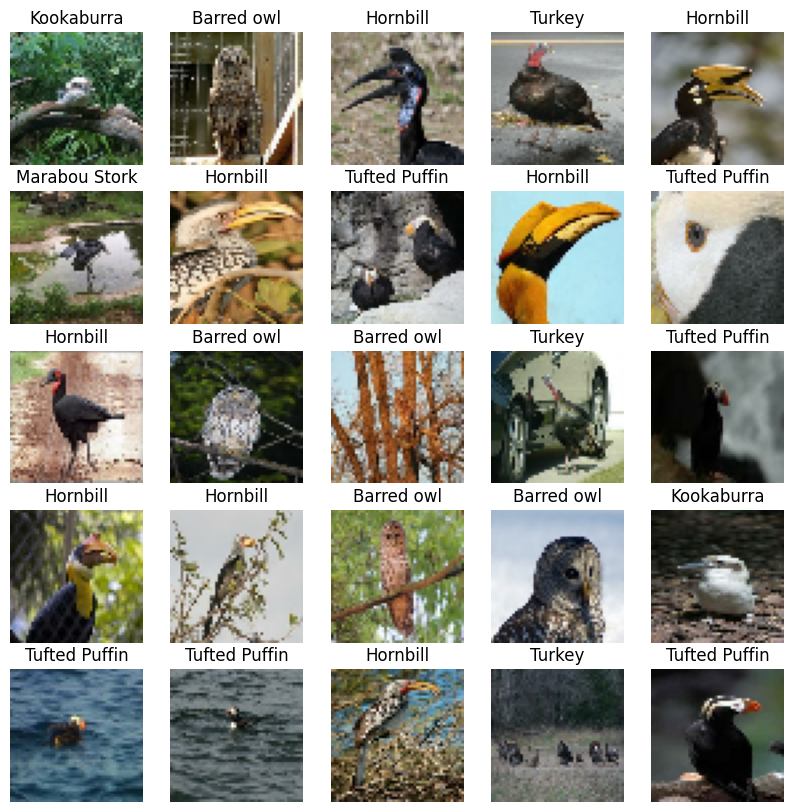

In [ ]:
#print the images and the models actual results

#plotting the validation set as it is smaller
import matplotlib.pyplot as plt
import numpy as np
label_actual=[]
label_actual.append('Actual:')

# so my batch size is 32, and i am doing .take(1), so take 1 batch which is 32 images, so you cant pull out more than 32 images

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    label_actual.append(class_names[labels[i]])

    plt.axis("off")

print(label_actual)



In [ ]:
print(label_actual)

[[[[['Actual:']]]]



 [[[['Tufted Puffin']]]]



 [[[['Barred owl']]]]



 [[[['Kookaburra']]]]



 [[[['Tufted Puffin']]]]



 [[[['Hornbill']]]]



 [[[['Barred owl']]]]



 [[[['Barred owl']]]]



 [[[['Tufted Puffin']]]]



 [[[['Hornbill']]]]



 [[[['Marabou Stork']]]]



 [[[['Kookaburra']]]]



 [[[['Marabou Stork']]]]



 [[[['Hornbill']]]]



 [[[['Turkey']]]]



 [[[['Hornbill']]]]



 [[[['Hornbill']]]]



 [[[['Tufted Puffin']]]]



 [[[['Barred owl']]]]



 [[[['Turkey']]]]



 [[[['Hornbill']]]]



 [[[['Turkey']]]]



 [[[['Turkey']]]]



 [[[['Turkey']]]]



 [[[['Marabou Stork']]]]



 [[[['Marabou Stork']]]]]
